## Week3  逻辑回归(主要用于分类)
- Sigmoid Function(Logistic Function)
$$g(z)=\frac{1}{1+e^{-z}}$$
- Decision Boundary  
将两类数据分开的函数  
- Cost Function  
使用该损失函数的[原因](https://blog.csdn.net/xiaoxiangzi222/article/details/55097570)  
若使用线性的损失函数, 由于此时是Logistic Function, 会造成多个极值点, 容易到收敛到局部最小值.所以使用: 
$$J(\theta)=\frac{1}{m}\sum_1^mCost(h_\theta(x^{(i)}, y^{(i)})$$
$$Cost(h_\theta(x), y)=\begin{cases}-log(h_\theta(x))\ \ \ if\ y = 1\\
                          -log(1-h_\theta(x))\ \ \ if\ y = 0\\
                          \end{cases}$$
该函数也可以写成:  
$$J(\theta)=-\frac{1}{m}\sum_1^m[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$
注意该损失函数是凸函数, 至于原因不知道............
- 梯度下降  
对该损失函数求导之后发现其导数与线性回归形式一致, 为:  
$$\theta_j = \theta_j-\frac{\alpha}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$
向量化后为:  
$$\theta = \theta - \frac{\alpha}{m}X^T(g(X\theta)-\vec y)$$
- Conjugate gradient, BFGS, L-BFGS  
三种比梯度下降法更快的求最优值方法, 且不需要设定学习率. 这三种方法一般调用库即可, 自己只需要编写损失函数以及损失函数的偏导函数.
- 过拟合的解决办法  
  1. 减少特征数量
  2. 正则化(减少参数的量级)  在原有的损失函数加上 &nbsp; $\lambda \sum_{j=1}^n\theta_j^2$  注意是从j=1开始, 因为$\theta_0$对应的$x_0$都是1
- 线性回归的正则化  
将正则化加入损失函数, 求其导数整理后得: 
$$\theta_0 = \theta_0-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_0^{(i)}$$
$$\theta_j = \theta_j(1-\alpha\frac{\lambda}{m})-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$
别的都和之前的一样, 只是每次$\theta$(除了$\theta_0$)都会乘一个$1-\alpha\frac{\lambda}{m}$, 易知该数为小于1的数  
对于Normal Equation, 也有:  
$$\theta = (X^TX+\lambda L)^{-1}X^Ty$$
将一个(n+1) * (n+1)的单位矩阵, 第一个元素置为0, 即得到$L$. $X^TX$可能是奇异矩阵, 不可逆, 但是$X^TX+\lambda L$将会是可逆的  
- 逻辑回归正则化的损失函数的导数与线性回归的形式一致. (只是$h_\theta(x^{(i)}不同$)


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op
# 读入数据, 特征为两次考试分数  标签为是否被大学承认
data1 = pd.read_csv('data/ex2data1.txt', names=['score1', 'score2', 'admitted'])
print(data1.head())

      score1     score2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


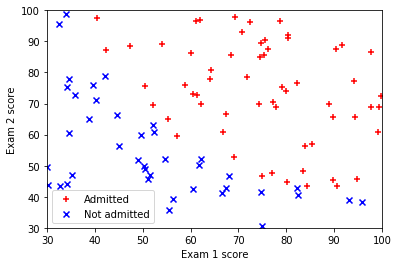

In [2]:
# 使用X保存两次分数, Y保存对应label
X = data1.iloc[:, :-1].values
Y = data1.iloc[:, [-1]].values
# label 为1的成绩
pos = X[Y[:,0]==1, :]
# label 为0的成绩
nag = X[Y[:,0]==0, :]
plt.scatter(pos[:,0], pos[:,1], c='r', marker='+', label='Admitted')
plt.scatter(nag[:,0], nag[:,1], c='b', marker='x', label='Not admitted')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.xlim([30,100])
plt.ylim([30,100])
plt.legend(loc='best')

In [3]:
# 初始化
initial_theta = np.zeros((3,1))
m = len(Y)
X = np.c_[np.ones(m), X]

In [4]:
# 定义sigmoid函数, Cost函数和Gradient
sigmoid_func = lambda x: 1/(1+np.exp(-x))
def Cost(theta, X, Y):
    # X为m*n Y为m*1 theta为n*1
    J = -1/len(Y)*((Y.T.dot(np.log(sigmoid_func(X.dot(theta))))) + (1.0-Y).T.dot(np.log(1-sigmoid_func(X.dot(theta)))))
    return J
def Gradient(theta, X, Y):
    # X为m*n Y为m*1 theta为n*1
    m, n = X.shape
    theta=theta.reshape((n,1))
    return (1.0/len(Y)*np.dot(X.T, sigmoid_func(X.dot(theta)) - Y)).flatten()
# 检查Cost函数和Gradient是否正确
print(Cost(initial_theta, X, Y))
print(Gradient(initial_theta, X, Y))
test_theta = np.array([[-24], [0.2], [0.2]])
print(Cost(test_theta, X, Y))
print(Gradient(test_theta, X, Y))


[[0.69314718]]
[ -0.1        -12.00921659 -11.26284221]
[[0.21833019]]
[0.04290299 2.56623412 2.64679737]


In [5]:
# 在课程中是使用octive中的fminunc函数, 这里使用scipy.optimize中的minimize来替代

result = op.minimize(fun=Cost, x0=initial_theta.flatten(), args=(X, Y), method='TNC', jac=Gradient)
#result_theta = op.minimize(fun=Cost, x0=initial_theta.flatten(), args=(X, Y), method='TNC', jac=Gradient)
print(result)  #结果与pdf中一致
result_theta = result['x']
                

     fun: array([0.2034977])
     jac: array([9.22161957e-09, 1.05799597e-07, 4.83191247e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131855,   0.20623159,   0.20147149])


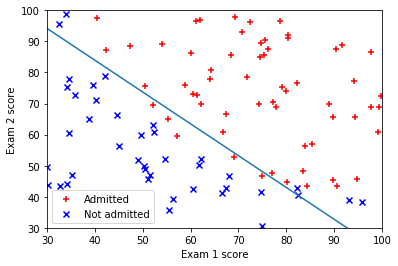

In [11]:
# 画出Decision Boundary
plt.scatter(pos[:,0], pos[:,1], c='r', marker='+', label='Admitted')
plt.scatter(nag[:,0], nag[:,1], c='b', marker='x', label='Not admitted')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.xlim([30,100])
plt.ylim([30,100])
x1_plot = np.linspace(30, 100)
# theta0+theta1*x1+theta2*x2=0
x2_plot = -result_theta[0]-result_theta[1]*x1_plot
x2_plot /= result_theta[2]
plt.plot(x1_plot, x2_plot)
plt.legend(loc='best')

In [30]:
# 预测
# 先预测 exam1=45 exam2=85 admit可能性是否为0.776
predict1 = np.array([1, 45, 85])
print(sigmoid_func((predict1*result_theta).sum()))
# 预测训练集的平均准确率 是否为0.89
predict = sigmoid_func((X*result_theta).sum(axis=1))>0.5  #True代表类型1, false代表类型2
print((Y[:,0] == predict).mean())

0.7762906222668583
0.89
